In [105]:
### El objetivo de este curso es el estudio de las técnicas de clasificación utilizadas en MS (sector financiero)
#
#  Tiene 4 partes:
#   - Clustering    (Ejemplo a replicar en https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)
#   - KNN
#   - Markov
#   - PCA (principales componentes algorithm)
#

In [106]:
# Imports necesarios

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [107]:
# 2.- K-Nearest Neighbours:

#   Es un ML no paramétrico utilizado para problemas de regresión y de clasificación. Es simple y versátil.
#
#   Es un algoritmo "lazy" porque no busca relaciones, si no que aprende "de memoria" el dataset
#  
#   El algoritmo es supervisado, y es de regresión cuando la variable dependiente es contínua, y de clasificación
#   cuando la variable dependiente es categórica.
#
# Algoritmo clasificacion:
#  1- Calcular la distancia de los puntos al punto test (la misma metrica que en la introducción al clustering)
#  2- Se escogen los k puntos mas cercanos.
#  3- Se clasifica el data test.
#
# Algoritmo regresión:
#  1.- Calcular la distancia de los puntos al punto test.
#  2.- Seleccionar los k puntos mas cercanos.
#  3.- Calcular el valor promedio de los k puntos mas cercanos para obtener el valor predicho.
#
#  A la hora de predecir por regresión, se pondera el valor de cada vecino en funcion de la distancia, para que
#  aquellos valores cercanos tengan un peso mayor
#
#  El objetivo es predecir el valor del punto en observacion (punto test) por medio de los valores de los k
#  puntos cercanos.
#
#  Hay que jugar con el Bias y la varianza a la hora de elegir el k. Si existe demasiado bias (sesgo), 
#  aparece overfitting. Si existe demasiada varianza, aparece underfitting. En ambos casos el error aumenta.
#  
#  Para este trade-off se utilizan distintas técnicas: K-Fold CV, Stratified K-Fold CV, Leave-P-Out CV
#  
#  Siempre se utiliza Cross Validation porque asi se puede aumentar la efectividad del modelo, compensando el 
#  problema derivado del trade-off de Bias y Variance considerablemente





In [108]:
# Como dataset de prueba vamos a utilizar el Iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# target: 0 = 'Iris-setosa'
#         1 = 'Iris-versicolor'
#         2 = 'Iris-virginica'

iris_df_2 = iris_df.copy()
iris_setosa = iris_df_2['target']==0
iris_versicolor = iris_df_2['target']==1
iris_virginica = iris_df_2['target']==2
condiciones = [iris_setosa, iris_versicolor, iris_virginica]
opciones = ['iris_setosa','iris_versicolor','iris_virginica']

iris_df_2['target']=np.select(condiciones, opciones, default="")
iris_df_2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa
5,5.4,3.9,1.7,0.4,iris_setosa
6,4.6,3.4,1.4,0.3,iris_setosa
7,5.0,3.4,1.5,0.2,iris_setosa
8,4.4,2.9,1.4,0.2,iris_setosa
9,4.9,3.1,1.5,0.1,iris_setosa


In [109]:
# Se separa la columna de target del resto del dataset:
X = iris_df_2.iloc[:, :-1].values
y = iris_df_2.iloc[:, 4].values


In [110]:
# Se separa en train y test (de momento es sin cross validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [111]:
# Se normalizan los datos (con respecto al x_train)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# Se entrena el classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# Se predice el resultado:
y_pred = classifier.predict(X_test)
# Se evalua el clasificador
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0  8  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    iris_setosa       1.00      1.00      1.00         6
iris_versicolor       0.89      1.00      0.94         8
 iris_virginica       1.00      0.94      0.97        16

      micro avg       0.97      0.97      0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [113]:
# La precision (score) del modelo viene dado por el siguiente valor:

print(classifier.score(X_test, y_test))

0.9666666666666667


Text(0, 0.5, 'Mean Error')

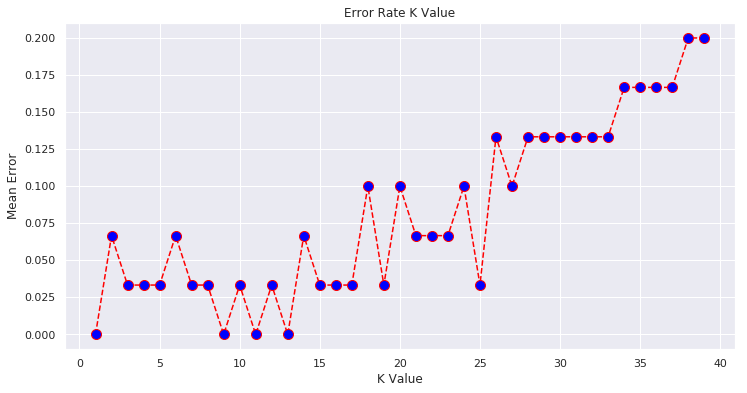

In [114]:
# Para ver si el número de K elegido es el correcto, se puede proceder de una forma similar al elbow graph del 
# clustering tipico:

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [115]:
# Por ultimo, e igualmente con K=5, se va a utilizar el K-Fold CV
modelo = KNeighborsClassifier(n_neighbors=5)
# Se entrena el modelo con cv=5
cv_scores = cross_val_score(modelo, X, y, cv=5)
# Se pinta la precision de cada modelo y su promedio
print(cv_scores)
print(np.mean(cv_scores))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


In [116]:
# Ahora con stratified k_fold CV
kf = StratifiedKFold(n_splits = 5)
modelo_2 = KNeighborsClassifier(n_neighbors=5)

ac = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    modelo_2.fit(X_train, y_train)
    y_pred = modelo_2.predict(X_test)
    ac.append(accuracy_score(y_test, y_pred))
print(ac)
print(np.mean(ac))

[0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0]
0.9733333333333334


In [ ]:
# Con Leave Out PFold es igual, da lo mismo, asi que paso de hacerlo.